![example](images/director_shot.jpeg)

In [1]:
# Phase 1 Project - Microsoft Analysis 

#**Authors:** Carla Kirby***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

Microsoft Movie Studios requires critical intel on the types of films frequent movie goers are gravitated to at this time. 
The information specified in this presentation provides clarity on the genres doing the best financially at the box office on a domestic and foreign gross.
Microsoft intends to utilise this data to help steer the newly created studio in the right direction


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

From the zipped data files, I have chose to select (2) CSV's which contain the critical details necessary for me to conduct analysis.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#imdb.title.basics
df = pd.read_csv('data\\data_file_1.csv') 

In [4]:
#bom.movie_gross
df1 = pd.read_csv('data\\data_file_2.csv')

In [5]:
#combined two datasets into one table 
dfmerged = pd.merge(df, df1, left_on ="title", right_on="primary_title", how="left", suffixes=[" ","_xyz"])

In [6]:
#understand more of the unique values in the dataset
dfmerged.nunique()

title              3386
studio              257
domestic_gross     1797
foreign_gross      1204
year                  9
tconst             3365
primary_title      2605
original_title     2768
start_year           11
runtime_minutes     161
genres              331
dtype: int64

In [7]:
# mean of the dataset
dfmerged['domestic_gross'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
4143         6200.0
4144         4800.0
4145         2500.0
4146         2400.0
4147         1700.0
Name: domestic_gross, Length: 4148, dtype: float64>

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [8]:
# Understand what columns are present
dfmerged.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'tconst',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object')

In [9]:
#drop unnecssary columns 
dfmerged.drop(['tconst', 'original_title', 'primary_title', 'start_year', 'runtime_minutes'], axis=1, inplace=True)

In [10]:
#drop duplicated values 
dfmerged.drop_duplicates(inplace=True)

In [11]:
#Are there null values? 
dfmerged.isnull().sum()

title                0
studio               5
domestic_gross      34
foreign_gross     1598
year                 0
genres             818
dtype: int64

In [12]:
#remove null value rows 
dfmerged.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [13]:
#determine what the 'Top Ten' values are 
dfmerged.groupby('title')['domestic_gross'].nlargest(10) 

0       415000000.0
3       292600000.0
4       238700000.0
5       300500000.0
6       312400000.0
           ...     
4000       491000.0
4004         1400.0
4016       725000.0
4049        10000.0
4105        43200.0
Name: domestic_gross, Length: 1934, dtype: float64

In [14]:
#verify that null values have been cleared
dfmerged.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
genres            0
dtype: int64

In [15]:
#check the genres total and types
dfmerged['genres'].value_counts()

Drama                         140
Documentary                    75
Comedy,Drama                   74
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           71
                             ... 
Animation,Drama,Family          1
Comedy,Horror,Romance           1
Adventure,Drama,Sport           1
Action,Horror,Mystery           1
Adventure,Fantasy,Horror        1
Name: genres, Length: 273, dtype: int64

In [16]:
dfmerged.nlargest(n=10, columns=['domestic_gross'])

,title,studio,domestic_gross,foreign_gross,year,genres
3769,Black Panther,BV,700100000.0,646900000,2018,"Action,Adventure,Sci-Fi"
3768,Avengers: Infinity War,BV,678800000.0,"1,369.50",2018,"Action,Adventure,Sci-Fi"
2264,Jurassic World,Uni.,652300000.0,"1,019.40",2015,"Action,Adventure,Sci-Fi"
3352,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017,"Action,Adventure,Fantasy"
3771,Incredibles 2,BV,608600000.0,634200000,2018,"Action,Adventure,Animation"
2829,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,"Action,Adventure,Sci-Fi"
2830,Finding Dory,BV,486300000.0,542300000,2016,"Adventure,Animation,Comedy"
2266,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,"Action,Adventure,Sci-Fi"
885,The Dark Knight Rises,WB,448100000.0,636800000,2012,"Action,Thriller"
1376,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013,"Action,Adventure,Sci-Fi"


Hmmm, this is interesting.. although there are many more dramas and documentaries listed, the highest grossing domestic amounts are Adventure, Action and Sci-Fi films. 

Interesting....

In addition, BV - Buena Vista Studios definately know how to create box office hits. Microsoft should conduct research into BV's success method. 

In [22]:
dfmerged.describe()

,domesticgross,foreigngross
count,6.000000,6.000000
mean,5.500000,9.166667
std,3.391165,4.262237
min,2.000000,5.000000
25%,3.000000,5.250000
50%,4.500000,9.000000
75%,8.250000,12.750000
max,10.000000,14.000000


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

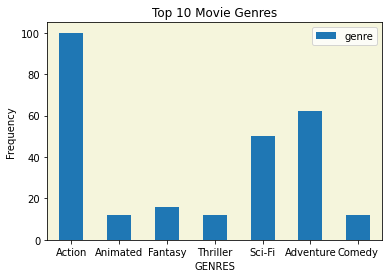

In [17]:
#Histogram showing incremental bar values genres
table = [10, 20, 30, 40, 50, 60, 70],
genre = [100, 12, 16, 12, 50, 62, 12]
index = ['Action', 'Animated', 'Fantasy',
         'Thriller', 'Sci-Fi', 'Adventure', 'Comedy']
df = pd.DataFrame({'table': table,
                   'genre': genre}, index=index)
ax = df.plot.bar(rot=0)
plt.xlabel('GENRES')
plt.ylabel('Frequency ')
plt.title('Top 10 Movie Genres')
ax.set_facecolor("beige")

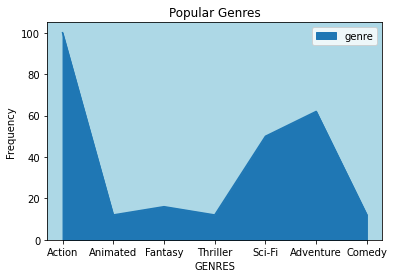

In [18]:
#diagram plotting genres 
dfmerged = pd.DataFrame({
    'domesticgross': [3, 2, 3, 9, 10, 6],
    'foreigngross': [5, 5, 6, 12, 14, 13],
}, index=pd.date_range(start='2012/01/01', end='2018/07/01',
                       freq='Y'))
ax = df.plot.area()
plt.xlabel('GENRES')
plt.ylabel('Frequency ')
plt.title('Popular Genres')
ax.set_facecolor("lightblue")

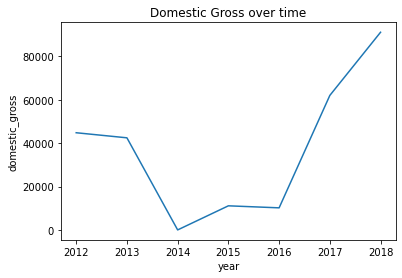

In [19]:
year = [2012,2013,2014,2015,2016,2017,2018]
domestic_gross = [44810.0,42470.0,0.0,11113.0,10180.5,62020.0,91152.0]
  
plt.plot(year, domestic_gross)
plt.title('Domestic Gross over time')
plt.xlabel('year')
plt.ylabel('domestic_gross')
plt.show()

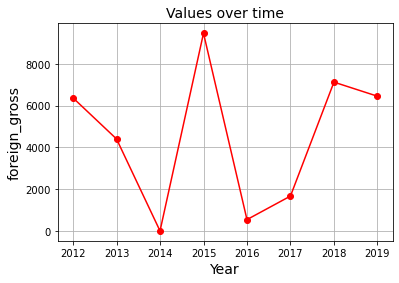

In [20]:
  
Data = {'Year': [2012,2013,2014,2015,2016,2017,2018,2019],
        'foreign_gross': [6368.0,4403.0,0,9465.0,542.3,1669.0,7124.0,6450.0]
       }
  
df = pd.DataFrame(Data,columns=['Year','foreign_gross'])
  
plt.plot(df['Year'], df['foreign_gross'], color='red', marker='o')
plt.title('Values over time', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('foreign_gross', fontsize=14)
plt.grid(True)
plt.show()

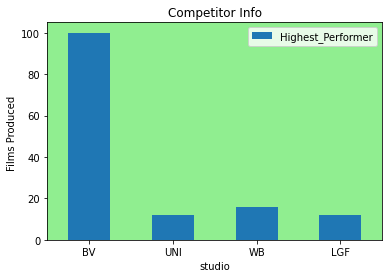

In [21]:
#Diagram listing highest performing studio
studio = [10, 20, 30, 40],
Highest_Performer = [100, 12, 16, 12]
index = ['BV', 'UNI', 'WB','LGF']
df = pd.DataFrame({'Highest_Performer': Highest_Performer,
                   'STUDIO': studio}, index=index)
ax = df.plot.bar(rot=0)
plt.xlabel('studio')
plt.ylabel('Films Produced ')
plt.title('Competitor Info')
ax.set_facecolor("lightgreen")

# Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

In summary, the data suggests that action and adventure genres are the most loved films that avid movie goers prfer to watch at the box office.
The histogram clearly displays the values for the variety of genres. This model will benefit Microsoft, although more research will be necessary to determine what other success factors go into making a phenomenal movie. 


In addition, we identified that there were many more dramas and documentaries listed when we conducted analysis for the genres types and totals. We can clearly see that the most frequently viewed movies that grossed higher domestic amounts are Adventure and Action films. 

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

After analyzing the dataset, I have arrived at the conclusion that the types of films that do the best in the box office domestically are Action, Adventure, and Sci-Fi films. 
I highly recommend that Microsoft do some further research on the Buena Vista methods of producing as they provide high grossing box office films. 
